In [1]:
import keras
print(keras.__version__)

2.15.0


In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install np_utils

In [5]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
#from keras.utils import np_utils

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


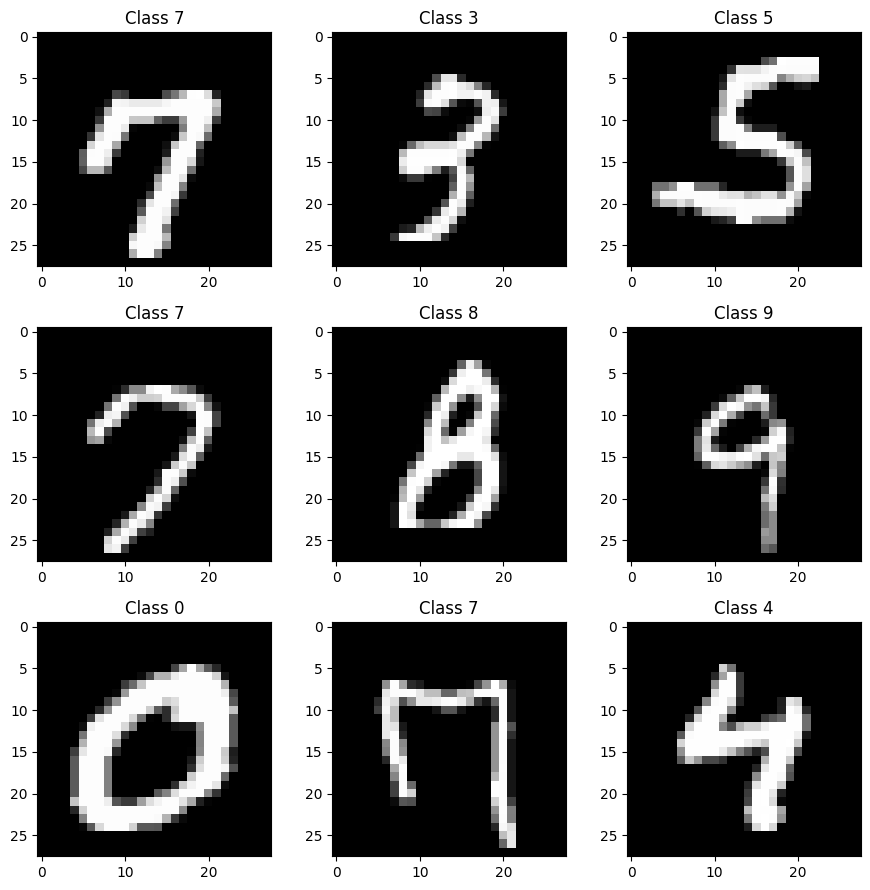

In [7]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [8]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0  211  116    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0   40  163  253   57    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0  143  254  254   58    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0  216  254  254   58    0   

In [9]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [10]:
def build_generator():
  noise_shape = (100,)

  model = Sequential()

  model.add(Dense(256, input_shape=noise_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))
  model.summary()

  noise = Input(shape=noise_shape)
  img = model(noise)

  return Model(noise, img)

In [11]:
def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [12]:
def train(epochs, batch_size=128, save_interval=500):

  (X_train, _), (_, _) = mnist.load_data()
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)

  half_batch = int(batch_size / 2)
  for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], half_batch)
  imgs = X_train[idx]

  noise = np.random.normal(0, 1, (half_batch, 100))
  gen_imgs = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
  d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #average loss

  noise = np.random.normal(0, 1, (batch_size, 100))
  valid_y = np.array([1] * batch_size)
  g_loss = combined.train_on_batch(noise, valid_y)
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
  if epoch % save_interval == 0:
              save_imgs(epoch)
  def save_imgs(epoch):
      r, c = 5, 5
      noise = np.random.normal(0, 1, (r * c, 100))
      gen_imgs = generator.predict(noise)
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(r, c)
      cnt = 0
      for i in range(r):
          for j in range(c):
              axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
              axs[i,j].axis('off')
              cnt += 1
      fig.savefig("images/mnist_%d.png" % epoch)
      plt.close()


In [16]:
import tensorflow as tf

In [17]:
optimizer = tf.keras.optimizers.legacy.Adam(0.0002, 0.5)
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 53350

In [18]:
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)
train(epochs=100, batch_size=32, save_interval=10)
generator.save('generator_model.h5')

1/1 [==============================] - 0s 201ms/step
99 [D loss: 0.675721, acc.: 65.62%] [G loss: 0.601577]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn


In [20]:
model = load_model('generator_model.h5')

In [21]:
vector = randn(100)
vector = vector.reshape(1, 100)

In [22]:
X = model.predict(vector)

1/1 [==============================] - 0s 125ms/step


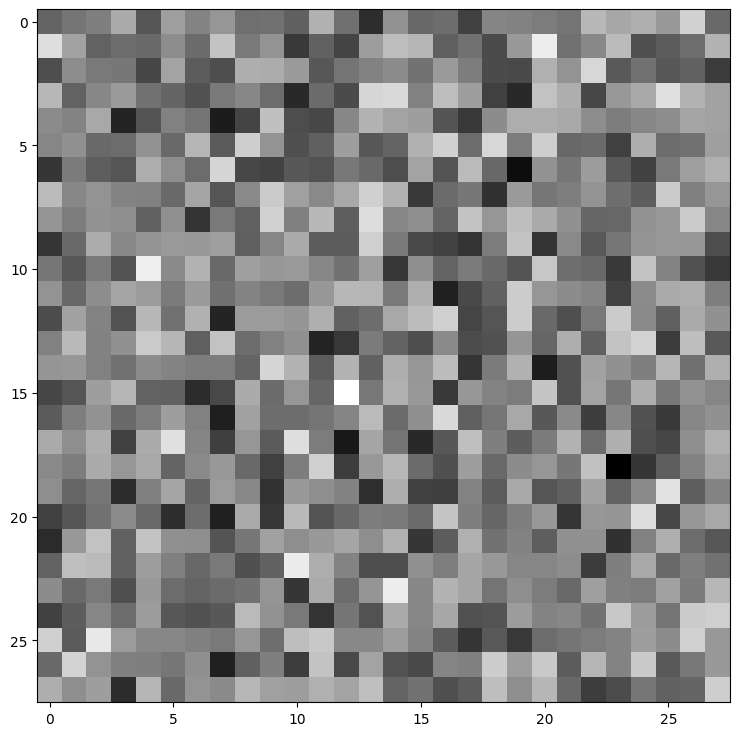

In [23]:
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

1/1 [==============================] - 0s 225ms/step


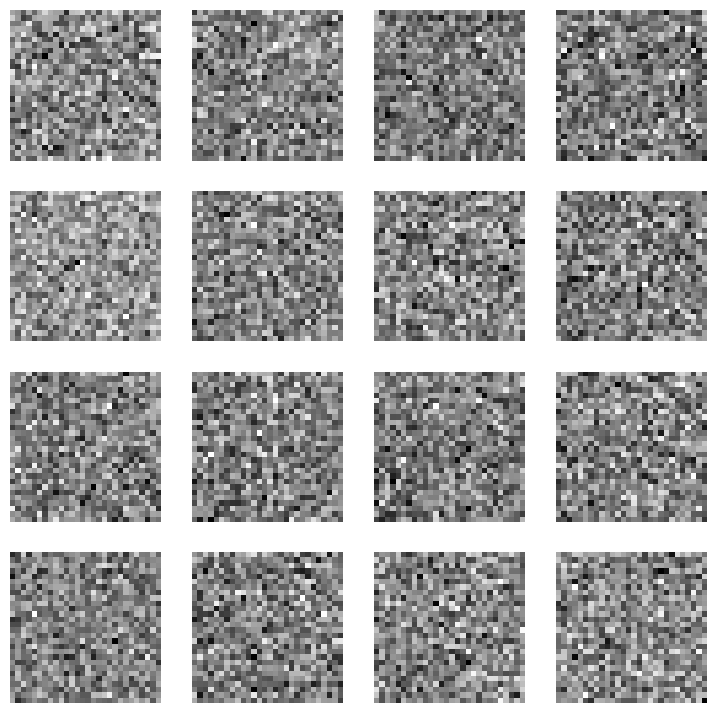

In [24]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()
model = load_model('generator_model.h5')
latent_points = generate_latent_points(100, 16)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 4)